In [ ]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install pandas
!pip install seaborn

**Install Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Load Data**

custcat colum:
1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

In [2]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Data Visualization and Analysis**

In [3]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: >

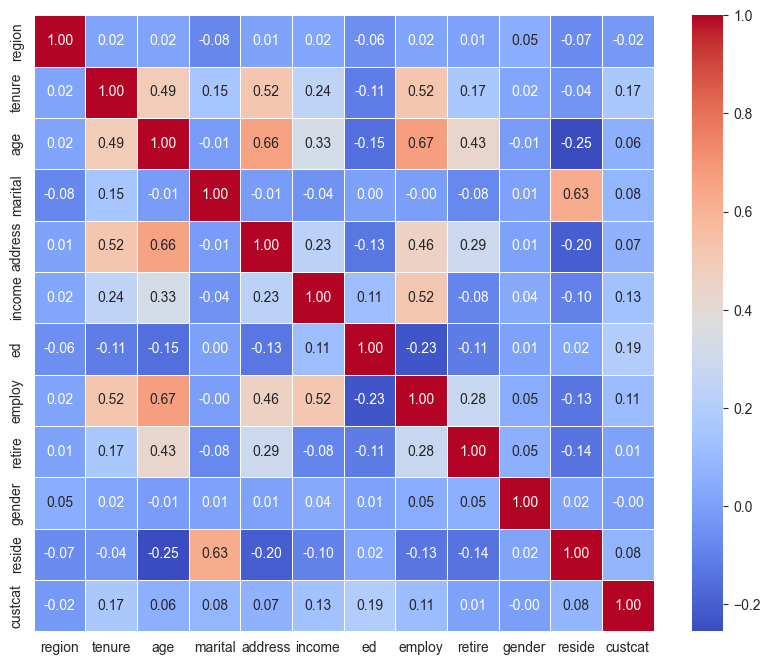

In [4]:
correlation_metrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_metrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [5]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [6]:
X = df.drop('custcat', axis=1)
y = df['custcat']

**Normalize Data**

In [7]:
X_norm = StandardScaler().fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

**KNN Classification**

In [9]:
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train, y_train)

In [10]:
yhat = knn_model.predict(X_test)

In [11]:
accuracy_score(y_test, yhat)

0.315

In [33]:
# choosing the correct value of k
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

for n in range(1, Ks+1):
    knn_model_n = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

In [34]:
std_acc

array([0.0324037 , 0.03208582, 0.03284623, 0.03298485, 0.03284623,
       0.03270321, 0.03337477, 0.0331191 , 0.03349627, 0.03324906,
       0.03284623, 0.03349627, 0.03324906, 0.03284623, 0.03349627,
       0.03394113, 0.033836  , 0.03372684, 0.03361361, 0.03337477,
       0.03372684, 0.03394113, 0.03413942, 0.03404225, 0.03404225,
       0.03404225, 0.03372684, 0.03394113, 0.034322  , 0.03440748,
       0.03456696, 0.03456696, 0.034322  , 0.03413942, 0.03404225,
       0.03440748, 0.03456696, 0.03477787, 0.03456696, 0.03456696,
       0.03456696, 0.034322  , 0.03448913, 0.03423266, 0.03404225,
       0.034322  , 0.03423266, 0.03423266, 0.03404225, 0.03394113,
       0.03394113, 0.03404225, 0.03413942, 0.034322  , 0.03413942,
       0.03413942, 0.03413942, 0.03394113, 0.03372684, 0.03394113,
       0.033836  , 0.03394113, 0.03394113, 0.03394113, 0.03349627,
       0.03349627, 0.03361361, 0.03372684, 0.03372684, 0.033836  ,
       0.03404225, 0.033836  , 0.033836  , 0.03404225, 0.03413

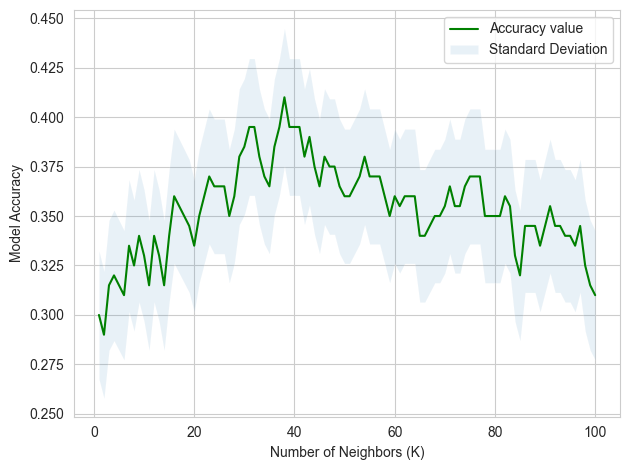

In [35]:
# Plot the model accuracy for a different number of neighbors
plt.plot(range(1, Ks +1), acc, "g")
plt.fill_between(range(1, Ks + 1), acc - 1 * std_acc, acc + 1 * std_acc, alpha=0.10)
plt.legend(("Accuracy value", "Standard Deviation"))
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Model Accuracy")
plt.tight_layout()
plt.show()

In [36]:
print(f"The best accuracy was with", acc.max())
print("with k =", acc.argmax() + 1)

The best accuracy was with 0.41
with k = 38
